In [ ]:
import pandas as pd
import geopandas as gpd
import pyreadstat
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Get the notebook directory and navigate to data folder
notebook_dir = os.path.dirname(os.path.abspath(__file__))
data_dir = os.path.join(os.path.dirname(notebook_dir), 'data')

In [ ]:
df_geo = gpd.read_file(os.path.join(data_dir, 'geo_pc4', 'georef-netherlands-postcode-pc4.geojson'))

Reading LRO metadata

In [ ]:
meta, df = pyreadstat.read_sav(os.path.join(data_dir, 'LRO 2023 met ww afstand', 'LRO 2023 met ww afstand.sav'))

In [7]:
column_lables = df.column_labels

In [8]:
column_lables = [label for label in column_lables if label is not None]
column_dict = {}
for label in column_lables:
    if '] ' in label:
        key, value = label.split('] ', 1)
        key = key.strip('[')
        column_dict[key] = value
    else:
        column_dict[label] = label

# LRO exploration

This section is basically the exploration of possible relavant agent variables to be added to the data.

## Working agents

1. Baan in loondienst (fulltime/parttime)
2. Zelfstandig ondernemer zonder personeel (bv. zzp/freelancer)
3. Zelfstandig ondernemer met personeel

In [2]:
# Filtering on those who work

working_df = meta[meta['W1'].isin([1, 2, 3])]


NameError: name 'meta' is not defined

## Registered work destinations

In [11]:
working_df['W9_1']

0        1011
3        2521
4        1016
5        1012
6            
         ... 
15041        
15042        
15043    5629
15044    9963
15045    5311
Name: W9_1, Length: 8308, dtype: object

In [12]:
len(working_df['W9_1'].unique())

1961

In [13]:
working_df.loc[working_df['W9_1'] == '', 'W9_1'] = None

3459  have destinations registered for their work place in W9_1 

In [14]:
working_df[working_df['W9_1'].notna()]

,W01,W02,W03,W04,W1,W2,W2_2,W2_2A5_open,V0,V2_2,...,leeftijd_weging,Geslacht_weging,Opleiding_weging,launch,weging_landsniveau,ophoogfactor,ophoogXweging,id_nr,distance_2023,distance_2022
0,0.0,0.0,0.0,1.0,2.0,14.0,1.0,,1.0,NaN,...,4.0,1.0,1.0,1.0,0.390793,949.679537,371.128230,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,12.0,4.0,,1.0,NaN,...,3.0,1.0,3.0,1.0,0.406571,949.679537,386.111873,4.0,66290.0,66290.0
4,0.0,0.0,0.0,1.0,2.0,10.0,1.0,,1.0,NaN,...,3.0,1.0,3.0,1.0,1.311703,949.679537,1245.697171,5.0,5591.0,5591.0
5,1.0,0.0,0.0,0.0,1.0,8.0,1.0,,1.0,NaN,...,2.0,1.0,3.0,1.0,1.618532,949.679537,1537.086842,6.0,0.0,0.0
7,0.0,0.0,0.0,1.0,1.0,13.0,1.0,,1.0,NaN,...,4.0,2.0,3.0,1.0,0.439714,949.679537,417.587100,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15039,1.0,0.0,0.0,0.0,1.0,15.0,1.0,,1.0,NaN,...,3.0,2.0,1.0,1.0,0.319602,949.679537,303.519456,15040.0,15247.0,22612.0
15040,0.0,1.0,0.0,0.0,1.0,3.0,1.0,,1.0,NaN,...,1.0,2.0,3.0,1.0,2.019464,949.679537,1917.843574,15041.0,45232.0,46941.0
15043,1.0,0.0,0.0,0.0,1.0,13.0,1.0,,2.0,1.0,...,3.0,1.0,2.0,1.0,0.938608,949.679537,891.377203,15044.0,2850.0,2850.0
15044,0.0,0.0,0.0,1.0,1.0,3.0,1.0,,1.0,NaN,...,1.0,1.0,3.0,1.0,0.952267,949.679537,904.348686,15045.0,31659.0,31659.0


In [15]:

working_df.loc[(working_df['W9_1'].isna()) & (working_df['W9B_1'] == ''), 'W9B_1'] = None

In [16]:
working_df.loc[(working_df['W9_1'].isna()) & (working_df['W9B_1'].notna()), 'W9B_1'] 

6        1012
13       2012
28       1017
42       1114
50       2135
         ... 
15015    1017
15017    7577
15027    2132
15029    5531
15041    3062
Name: W9B_1, Length: 440, dtype: object

In [17]:
working_df[(working_df['W9_1'].isna()) & (working_df['W9B_1'].notna())] 

,W01,W02,W03,W04,W1,W2,W2_2,W2_2A5_open,V0,V2_2,...,leeftijd_weging,Geslacht_weging,Opleiding_weging,launch,weging_landsniveau,ophoogfactor,ophoogXweging,id_nr,distance_2023,distance_2022
6,1.0,0.0,0.0,0.0,2.0,14.0,5.0,Management,2.0,5.0,...,3.0,1.0,3.0,1.0,0.406571,949.679537,386.111873,7.0,0.0,0.0
13,1.0,0.0,0.0,0.0,1.0,11.0,1.0,,2.0,5.0,...,1.0,1.0,1.0,1.0,0.765879,949.679537,727.339597,14.0,72004.0,72004.0
28,0.0,0.0,0.0,1.0,1.0,9.0,1.0,,1.0,NaN,...,3.0,1.0,3.0,1.0,1.311703,949.679537,1245.697171,29.0,0.0,0.0
42,0.0,0.0,0.0,1.0,1.0,15.0,5.0,Werkgelegenheid,1.0,NaN,...,3.0,2.0,3.0,1.0,0.426826,949.679537,405.348244,43.0,11149.0,11149.0
50,0.0,0.0,1.0,0.0,1.0,14.0,3.0,,1.0,NaN,...,3.0,2.0,1.0,1.0,0.398239,949.679537,378.198978,51.0,32133.0,32133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15015,0.0,0.0,0.0,1.0,1.0,12.0,1.0,,1.0,NaN,...,2.0,2.0,3.0,1.0,0.593534,949.679537,563.667425,15016.0,104653.0,104653.0
15017,0.0,0.0,0.0,1.0,2.0,13.0,3.0,,1.0,NaN,...,3.0,2.0,3.0,1.0,0.504577,949.679537,479.186778,15018.0,0.0,0.0
15027,0.0,0.0,0.0,1.0,1.0,15.0,1.0,,1.0,NaN,...,1.0,2.0,3.0,1.0,0.911863,949.679537,865.977482,15028.0,59156.0,59156.0
15029,0.0,0.0,0.0,1.0,2.0,11.0,1.0,,1.0,NaN,...,4.0,1.0,3.0,1.0,0.320445,949.679537,304.319866,15030.0,0.0,0.0


In [18]:
working_df['destination_pc4'] = working_df['W9_1']

C:\Users\yeslamijadidi\AppData\Local\Temp\ipykernel_13884\3298424435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['destination_pc4'] = working_df['W9_1']


In [19]:
working_df['destination_pc4'].notna().sum()

5906

In [20]:
working_df['destination_pc4'].isna().sum()

2402

In [21]:
working_df.loc[working_df['destination_pc4'].isna(), 'destination_pc4'] = working_df['W9B_1']

### Number of workers in the dataset

6346  have destinations registered for their work place both in W9_1 and W9B_1

In [22]:
working_df['destination_pc4'].notna().sum()

6346

## Destonation choice pc4

In [23]:
working_df['destination_pc4'].isna().sum()

1962

In [24]:
working_df = working_df[working_df['destination_pc4'].notna()]

In [25]:
working_df[['W9_2', 'destination_pc4']]

,W9_2,destination_pc4
0,,1011
3,den haag,2521
4,,1016
5,Amsterdam,1012
6,,1012
...,...,...
15040,Almere,1315
15041,,3062
15043,Eindhoven,5629
15044,Gronigen,9963


Merging the shapefile on pc4 codes to have the destinations visualized.

In [26]:
working_df = working_df.merge(df_geo, left_on='destination_pc4', right_on='pc4_code', how='left')
working_df = working_df.drop(columns=['geo_point_2d', 'pc4_code', 'year', 'prov_code', 'gem_code'])

In [27]:
address_occurrence_df = working_df.groupby(['destination_pc4', 'geometry']).size().reset_index(name='occurrence_count')
address_occurrence_df

,destination_pc4,geometry,occurrence_count
0,1011,"POLYGON ((4.90562 52.37935, 4.90562 52.37935, ...",16
1,1012,"POLYGON ((4.90362 52.38179, 4.90467 52.38148, ...",16
2,1013,"POLYGON ((4.8739 52.40932, 4.87916 52.40553, 4...",10
3,1014,"MULTIPOLYGON (((4.87906 52.39651, 4.87904 52.3...",8
4,1015,"POLYGON ((4.88234 52.3851, 4.88289 52.38494, 4...",2
...,...,...,...
1896,9971,"POLYGON ((6.34685 53.37491, 6.3468 53.37468, 6...",1
1897,9974,"POLYGON ((6.26857 53.36653, 6.26858 53.36626, ...",1
1898,9979,"POLYGON ((6.8182 53.4636, 6.81821 53.46359, 6....",3
1899,9981,"POLYGON ((6.73096 53.46285, 6.72946 53.46222, ...",2


### Unique destinations registered
2053

In [28]:
len(working_df[working_df['destination_pc4'].notna()]['destination_pc4'].unique())

2053

In [29]:
working_df[['W9_2', 'destination_pc4', 'gem_name']]

,W9_2,destination_pc4,gem_name
0,,1011,Amsterdam
1,den haag,2521,'s-Gravenhage
2,,1016,Amsterdam
3,Amsterdam,1012,Amsterdam
4,,1012,Amsterdam
...,...,...,...
6341,Almere,1315,Almere
6342,,3062,Rotterdam
6343,Eindhoven,5629,Eindhoven
6344,Gronigen,9963,Het Hogeland


In [50]:
df_geo_city = df_geo.dissolve(by='gem_name', as_index=False)

# Agent charactristics

- W9_1 where they work
- W3_extra where they live
- W2 work sector
- A2 Age
- A3 Gender
- W6_1 number of days to go by car
-------------------------------------------------------------------------------------------------
- A6 Wat is de samenstelling van jouw huishouden?
Meerdere antwoorden mogelijk
1. Ik woon alleen [uitsluitend]
2. Ik woon samen met partner zonder kinderen [uitsluitend]
3. Ik woon met/zonder partner en minstens één kind van 12 jaar of jonger
4. Ik woon met/zonder partner en minstens één kind tussen 13 en 17 jaar
5. Ik woon met/zonder partner en kind(eren) vanaf 18 jaar en ouder
6. Ik woon met andere mensen samen (bijv. met familie, in studentenhuis,
woongroep, etc.)
7. Wil ik niet zeggen
8. Anders, namelijk …
-------------------------------------------------------------------------------------------------
- T1:
1. I am allowed to work (partly) at home or outside the work location and I sometimes do this
2. I am allowed to work (partly) at home or outside the work location but I never do this
3. I have no possibility to work from home, even though my work would lend itself to this
4. I have no possibility to work from home, my work does not lend itself to this
-------------------------------------------------------------------------------------------------
- T2:
Which situation is most applicable to the way you currently work from home?
1. I work from home on the same fixed day(s) every week
2. I work from home on one or more days every week, but not on fixed days
3. I occasionally work a half day or a day from home
4. I work from home for a few hours when it suits me to avoid rush hour
5. Other, namely …
-------------------------------------------------------------------------------------------------

- W4:
How many days do you work (generally)
-------------------------------------------------------------------------------------------------

- W5:
work at home - work location - external location - partially at each

Based on T1: Only ask if  “home” and “partly home” are filled in for zero days
T1 What applies to you with regard to working from home?

Filtering on those that at least one day they go by car to work location.

In [139]:
working_df =  working_df[working_df['W6_1']>1]

There are 2826 agents left that go at least 1 day to work location by car

In [140]:
len(working_df)

2826

In [141]:
working_df['work_flexibility'] = 'flexible'
working_df.loc[(working_df['T1'].notna() & working_df['T1'].isin([3, 4])), 'work_flexibility'] = 'non_flexible'

1583 have flexible situation

In [142]:
len(working_df[working_df['work_flexibility']== 'flexible'])

1583

### Chosen variables

In [143]:

df_agent = working_df[['id_nr', 'destination_pc4', 'W3_extra','W2', 'A2', 'A3', 'A6_1', 'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_6'
                       , 'A6_8', 'A6_8_open',
                       'W6_1', 'T1', 'T2','W4','W5c_A', 'geometry', 'work_flexibility', 'stedelijkheid_weging']]

### sector cluster

In [144]:
sector_clusters = {
    1: 'Primary Sector',
    2: 'Industry',
    3: 'Primary Sector',
    4: 'Primary Sector',
    5: 'Business & Finance',
    6: 'Hospitality',
    7: 'Business & Finance',
    8: 'ICT',
    9: 'Business & Finance',
    10: 'Business & Finance',
    11: 'Public Administraition',
    12: 'Education',
    13: 'Health & welfare',
    14: 'Other',
    15: 'Other'
}


df_agent['sector_cluster'] = df_agent['W2'].map(sector_clusters)

C:\Users\yeslamijadidi\AppData\Local\Temp\ipykernel_13884\32497097.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agent['sector_cluster'] = df_agent['W2'].map(sector_clusters)


In [145]:
age_bins = [0, 17, 29, 44, 64, float('inf')]
age_labels = ['A', 'B', 'C', 'D', 'E']
df_agent['age_category'] = pd.cut(df_agent['A2'], bins=age_bins, labels=age_labels, right=False)

C:\Users\yeslamijadidi\AppData\Local\Temp\ipykernel_13884\3103690058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agent['age_category'] = pd.cut(df_agent['A2'], bins=age_bins, labels=age_labels, right=False)


In [146]:
df_agent['work_type'] = df_agent['W4'].apply(lambda x: 'part_time' if x <= 4 else 'full_time')

C:\Users\yeslamijadidi\AppData\Local\Temp\ipykernel_13884\3933864526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agent['work_type'] = df_agent['W4'].apply(lambda x: 'part_time' if x <= 4 else 'full_time')


Nonbinaries: 46, set them to NA

In [147]:
df_agent.loc[df_agent['A3'].isin([3, 4]), 'A3'] = None

In [148]:
df_agent = df_agent.rename(columns={'A3': 'gender', 'W3_extra': 'living_adress', 'A2': 'age', 'W2': 'work_sector', 'W6_1': 'car_used', 
                                    'A6_1': 'alone', 'A6_2': 'without_child', 'A6_3': 'child_<12',
                                    'A6_4': 'child_13:17', 'A6_5': 'child_>18', 'A6_6':'other_people', 'W4': 'n_working_days', 
                                    'stedelijkheid_weging': 'urbanity_level'})

In [150]:
def determine_hh_compound(row):
    if row['alone'] == 1:
        return 'no_child'
    elif row['without_child'] == 1:
        return 'no_child'
    elif row['child_<12'] == 1:
        return 'child'
    elif row['child_13:17'] == 1 or row['child_>18'] == 1:
        return 'child'
    elif row['other_people'] == 1:
        return 'no_child'
    else:
        return 'no_child'

df_agent['HH_compound'] = df_agent.apply(determine_hh_compound, axis=1)


In [151]:
change_age_id_numbers = df_agent.loc[df_agent['A6_8'] == 1, 'id_nr']

Based on what they said in 'other', I decided which group they belong to.

In [152]:
custom_hh_map = {
    1423.0: 'no_child',  # LAT (Living Apart Together)
    1751.0: 'no_child',  # met partner ren 50% (co-ouderschap)
    2573.0: 'no_child',  # Bij mijn ouders
    2996.0: 'no_child',  # Bij mijn ouders
    5004.0: 'child',     # Af en toe met kids
    5651.0: 'no_child',  # ik verblijf deels op vakantiepark
    5846.0: 'child',     # Man en vrouw 5 kinderen
    5968.0: 'no_child',  # Met ouder/broers
    6656.0: 'no_child',  # samen met 2 ouders
    7642.0: 'no_child',  # Thuis bij mijn ouders
    7848.0: 'no_child',  # Bij moeder
    9008.0: 'no_child',  # Ouders
    9100.0: 'child',     # woon samen met 2 kinderen onder de 12
    9614.0: 'no_child', # Kom op zeg! gewoon Getrouwd.
    9980.0: 'child',     # Met partner, kinderen ouder dan 18 in weekend ...
    11272.0: 'child',    # samen met partner en twee kinderen jonger dan 12
    12278.0: 'no_child', # Thuiswonend
    12495.0: 'no_child', # ouders
    12775.0: 'no_child', # Ik woon bij mijn ouders
    13457.0: 'child',    # Met partner en deels uitwonende studerende kinderen
    13687.0: 'no_child', # Inwonend bij ouders
    13794.0: 'no_child',# Getrouwd zonder kinderen
    13868.0: 'child',    # gescheiden, omgangsregeling mbt de kinderen
    14094.0: 'no_child', # in een doos in het magazijn van ene supermarkt
    14152.0: 'no_child', # Bij ouders
    14343.0: 'no_child', # Vader en moeder
    15003.0: 'no_child',        # weduwnaar  sinds een goed jaar
}

df_agent.loc[df_agent['id_nr'].isin(custom_hh_map.keys()), 'HH_compound'] = df_agent['id_nr'].map(custom_hh_map)


too small of a sample, it's only 44 people that travel later than rush hour

In [153]:
df_agent.drop(columns=['alone', 'without_child', 'child_<12', 'child_13:17', 'child_>18', 'other_people'], inplace=True)

In [154]:
df_agent = df_agent.rename(columns={'geometry': 'des_geo'})

In [155]:
df_agent = df_agent.merge(df_geo[['gem_name', 'pc4_code']], left_on='destination_pc4', right_on='pc4_code', how='left')
df_agent = df_agent.rename(columns={'gem_name': 'des_city'})
df_agent = df_agent.drop(columns=['pc4_code'])
df_agent

,id_nr,destination_pc4,living_adress,work_sector,age,gender,A6_8,A6_8_open,car_used,T1,...,n_working_days,W5c_A,des_geo,work_flexibility,urbanity_level,sector_cluster,age_category,work_type,HH_compound,des_city
0,1.0,1011,1011,14.0,66.0,1.0,0.0,,2.0,NaN,...,5.0,0.0,"POLYGON ((4.90562 52.37935, 4.90562 52.37935, ...",flexible,1.0,Other,E,full_time,child,Amsterdam
1,47.0,1217,1021,15.0,39.0,1.0,0.0,,4.0,4.0,...,5.0,45.0,"MULTIPOLYGON (((5.17144 52.22655, 5.17143 52.2...",non_flexible,1.0,Other,C,full_time,no_child,Hilversum
2,52.0,1034,1024,13.0,34.0,2.0,0.0,,4.0,NaN,...,5.0,40.0,"POLYGON ((4.91615 52.41954, 4.91624 52.41951, ...",flexible,1.0,Health & welfare,C,full_time,no_child,Amsterdam
3,53.0,3607,1024,12.0,39.0,1.0,0.0,,4.0,4.0,...,4.0,35.0,"POLYGON ((5.01523 52.14698, 5.01525 52.14696, ...",non_flexible,1.0,Education,C,part_time,child,Stichtse Vecht
4,57.0,1061,1024,13.0,40.0,1.0,0.0,,4.0,4.0,...,4.0,70.0,"POLYGON ((4.84498 52.38515, 4.845 52.38481, 4....",non_flexible,1.0,Health & welfare,C,part_time,no_child,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,15031.0,2215,5643,15.0,50.0,1.0,0.0,,4.0,NaN,...,5.0,0.0,"POLYGON ((4.52533 52.24607, 4.52531 52.24605, ...",flexible,1.0,Other,D,full_time,no_child,Teylingen
2822,15032.0,1042,1063,14.0,54.0,1.0,0.0,,2.0,4.0,...,5.0,34.0,"POLYGON ((4.82339 52.41866, 4.82341 52.41866, ...",non_flexible,1.0,Other,D,full_time,child,Amsterdam
2823,15035.0,3901,3905,2.0,57.0,1.0,0.0,,4.0,4.0,...,5.0,27.0,"MULTIPOLYGON (((5.55464 52.01663, 5.55425 52.0...",non_flexible,2.0,Industry,D,full_time,no_child,Veenendaal
2824,15041.0,1315,1456,3.0,30.0,2.0,0.0,,3.0,NaN,...,5.0,34.0,"POLYGON ((5.22082 52.37682, 5.22083 52.3768, 5...",flexible,3.0,Primary Sector,C,full_time,no_child,Almere


In [156]:
df_agent = df_agent.merge(df_geo[['gem_name', 'pc4_code', 'geometry']], left_on='living_adress', right_on='pc4_code', how='left')
df_agent = df_agent.rename(columns={'gem_name': 'living_city', 'geometry': 'living_city_geo'})
df_agent = df_agent.drop(columns=['pc4_code'])
df_agent

,id_nr,destination_pc4,living_adress,work_sector,age,gender,A6_8,A6_8_open,car_used,T1,...,des_geo,work_flexibility,urbanity_level,sector_cluster,age_category,work_type,HH_compound,des_city,living_city,living_city_geo
0,1.0,1011,1011,14.0,66.0,1.0,0.0,,2.0,NaN,...,"POLYGON ((4.90562 52.37935, 4.90562 52.37935, ...",flexible,1.0,Other,E,full_time,child,Amsterdam,Amsterdam,"POLYGON ((4.90562 52.37935, 4.90562 52.37935, ..."
1,47.0,1217,1021,15.0,39.0,1.0,0.0,,4.0,4.0,...,"MULTIPOLYGON (((5.17144 52.22655, 5.17143 52.2...",non_flexible,1.0,Other,C,full_time,no_child,Hilversum,Amsterdam,"POLYGON ((4.92243 52.38937, 4.92244 52.38937, ..."
2,52.0,1034,1024,13.0,34.0,2.0,0.0,,4.0,NaN,...,"POLYGON ((4.91615 52.41954, 4.91624 52.41951, ...",flexible,1.0,Health & welfare,C,full_time,no_child,Amsterdam,Amsterdam,"POLYGON ((4.95997 52.39886, 4.96008 52.39877, ..."
3,53.0,3607,1024,12.0,39.0,1.0,0.0,,4.0,4.0,...,"POLYGON ((5.01523 52.14698, 5.01525 52.14696, ...",non_flexible,1.0,Education,C,part_time,child,Stichtse Vecht,Amsterdam,"POLYGON ((4.95997 52.39886, 4.96008 52.39877, ..."
4,57.0,1061,1024,13.0,40.0,1.0,0.0,,4.0,4.0,...,"POLYGON ((4.84498 52.38515, 4.845 52.38481, 4....",non_flexible,1.0,Health & welfare,C,part_time,no_child,Amsterdam,Amsterdam,"POLYGON ((4.95997 52.39886, 4.96008 52.39877, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,15031.0,2215,5643,15.0,50.0,1.0,0.0,,4.0,NaN,...,"POLYGON ((4.52533 52.24607, 4.52531 52.24605, ...",flexible,1.0,Other,D,full_time,no_child,Teylingen,Eindhoven,"MULTIPOLYGON (((5.50507 51.42083, 5.50507 51.4..."
2822,15032.0,1042,1063,14.0,54.0,1.0,0.0,,2.0,4.0,...,"POLYGON ((4.82339 52.41866, 4.82341 52.41866, ...",non_flexible,1.0,Other,D,full_time,child,Amsterdam,Amsterdam,"MULTIPOLYGON (((4.79337 52.38456, 4.7922 52.38..."
2823,15035.0,3901,3905,2.0,57.0,1.0,0.0,,4.0,4.0,...,"MULTIPOLYGON (((5.55464 52.01663, 5.55425 52.0...",non_flexible,2.0,Industry,D,full_time,no_child,Veenendaal,Veenendaal,"POLYGON ((5.55468 52.04997, 5.55494 52.04993, ..."
2824,15041.0,1315,1456,3.0,30.0,2.0,0.0,,3.0,NaN,...,"POLYGON ((5.22082 52.37682, 5.22083 52.3768, 5...",flexible,3.0,Primary Sector,C,full_time,no_child,Almere,Wormerland,"POLYGON ((4.89458 52.51885, 4.89476 52.51884, ..."


In [157]:
df_agent['same_city'] = df_agent['des_city'] == df_agent['living_city']
df_agent['same_city'] = df_agent['same_city'].map({True: 'yes', False: 'no'})
df_agent

,id_nr,destination_pc4,living_adress,work_sector,age,gender,A6_8,A6_8_open,car_used,T1,...,work_flexibility,urbanity_level,sector_cluster,age_category,work_type,HH_compound,des_city,living_city,living_city_geo,same_city
0,1.0,1011,1011,14.0,66.0,1.0,0.0,,2.0,NaN,...,flexible,1.0,Other,E,full_time,child,Amsterdam,Amsterdam,"POLYGON ((4.90562 52.37935, 4.90562 52.37935, ...",yes
1,47.0,1217,1021,15.0,39.0,1.0,0.0,,4.0,4.0,...,non_flexible,1.0,Other,C,full_time,no_child,Hilversum,Amsterdam,"POLYGON ((4.92243 52.38937, 4.92244 52.38937, ...",no
2,52.0,1034,1024,13.0,34.0,2.0,0.0,,4.0,NaN,...,flexible,1.0,Health & welfare,C,full_time,no_child,Amsterdam,Amsterdam,"POLYGON ((4.95997 52.39886, 4.96008 52.39877, ...",yes
3,53.0,3607,1024,12.0,39.0,1.0,0.0,,4.0,4.0,...,non_flexible,1.0,Education,C,part_time,child,Stichtse Vecht,Amsterdam,"POLYGON ((4.95997 52.39886, 4.96008 52.39877, ...",no
4,57.0,1061,1024,13.0,40.0,1.0,0.0,,4.0,4.0,...,non_flexible,1.0,Health & welfare,C,part_time,no_child,Amsterdam,Amsterdam,"POLYGON ((4.95997 52.39886, 4.96008 52.39877, ...",yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,15031.0,2215,5643,15.0,50.0,1.0,0.0,,4.0,NaN,...,flexible,1.0,Other,D,full_time,no_child,Teylingen,Eindhoven,"MULTIPOLYGON (((5.50507 51.42083, 5.50507 51.4...",no
2822,15032.0,1042,1063,14.0,54.0,1.0,0.0,,2.0,4.0,...,non_flexible,1.0,Other,D,full_time,child,Amsterdam,Amsterdam,"MULTIPOLYGON (((4.79337 52.38456, 4.7922 52.38...",yes
2823,15035.0,3901,3905,2.0,57.0,1.0,0.0,,4.0,4.0,...,non_flexible,2.0,Industry,D,full_time,no_child,Veenendaal,Veenendaal,"POLYGON ((5.55468 52.04997, 5.55494 52.04993, ...",yes
2824,15041.0,1315,1456,3.0,30.0,2.0,0.0,,3.0,NaN,...,flexible,3.0,Primary Sector,C,full_time,no_child,Almere,Wormerland,"POLYGON ((4.89458 52.51885, 4.89476 52.51884, ...",no


Interesting!

In [158]:
df_agent.groupby('same_city').size()

same_city
no     2114
yes     712
dtype: int64

In [159]:
df_agent = df_agent.dropna(subset=['living_city_geo', 'des_geo'])

In [160]:
len(df_agent)

2726

### Travel time analysis

In [ ]:
df_tt = pd.read_csv(r'forYasi/final_symmetric_interzonal_applied_tt_v3.csv')

In [162]:
# Ensure both columns have the same data type
df_agent['living_adress'] = df_agent['living_adress'].astype(float)
df_agent['destination_pc4'] = df_agent['destination_pc4'].astype(float)
df_tt['pc4_from'] = df_tt['pc4_from'].astype(float)

# Perform the merge
df_agent = df_agent.merge(df_tt[['pc4_from', 'pc4_to', 'ochtend_tt']], left_on=['living_adress', 'destination_pc4'],
               right_on=['pc4_from', 'pc4_to'], how='left')

C:\Users\yeslamijadidi\AppData\Local\Temp\ipykernel_13884\2030399551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agent['living_adress'] = df_agent['living_adress'].astype(float)
C:\Users\yeslamijadidi\AppData\Local\Temp\ipykernel_13884\2030399551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agent['destination_pc4'] = df_agent['destination_pc4'].astype(float)


In [163]:
df_agent.drop(columns=['pc4_from', 'pc4_to'], inplace=True)

In [164]:
df_agent = df_agent.merge(df_tt[['pc4_to', 'pc4_from', 'avond_tt']], left_on=['destination_pc4', 'living_adress'],
               right_on=['pc4_from', 'pc4_to'], how='left')

In [165]:
df_agent.drop(columns=['pc4_from', 'pc4_to'], inplace=True)

In [166]:
df_agent['total_tt_min'] = (df_agent['ochtend_tt'] + df_agent['avond_tt']) / 60.0

<Axes: title={'center': 'total_tt_min'}, xlabel='work_flexibility'>

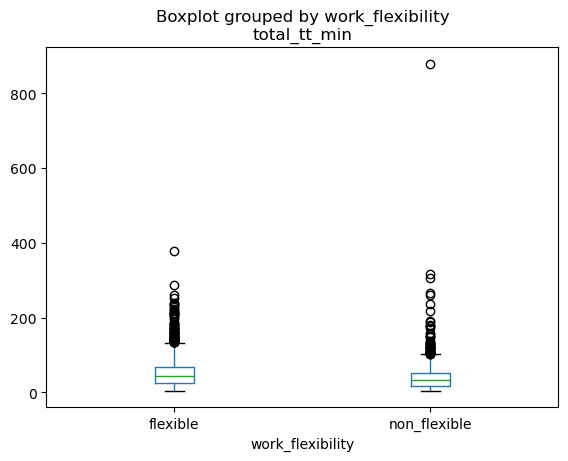

In [167]:
df_agent.boxplot(column='total_tt_min', by='work_flexibility', grid=False)

In [168]:
df_agent['total_tt_min'].quantile([0.25, 0.5, 0.75,0.8, 0.85, 0.9, 0.95, 0.99, 1])

0.25     21.950947
0.50     38.298277
0.75     61.028753
0.80     68.203431
0.85     76.116854
0.90     90.393812
0.95    114.329351
0.99    193.246523
1.00    878.793717
Name: total_tt_min, dtype: float64

The outliers are removed

In [169]:

Q1 = df_agent['total_tt_min'].quantile(0.25)
Q3 = df_agent['total_tt_min'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(len(df_agent[(df_agent['total_tt_min'] >= lower_bound) & (df_agent['total_tt_min'] <= upper_bound)]))
df_agent = df_agent[(df_agent['total_tt_min'] >= lower_bound) & (df_agent['total_tt_min'] <= upper_bound)]

2550


saving

saving filtered df_agent

In [170]:
# df_agent.to_csv('df_agent_v5.csv', index=False)

## Variable exploration

In [171]:

numeric_columns = df_agent[['work_flexibility', 'total_tt_min']].select_dtypes(include=['number']).columns

df_agent[['work_flexibility', 'total_tt_min']].groupby(['work_flexibility'])[numeric_columns].agg(['mean', 'std', 'count', 'max', 'min']).reset_index()

work_flexibility total_tt_min                                       
                           mean        std count         max       min
0         flexible    45.297420  26.784216  1405  119.056065  3.263210
1     non_flexible    36.000457  23.933493  1145  119.237903  3.680867

In [172]:
numeric_columns = df_agent[['HH_compound', 'total_tt_min']].select_dtypes(include=['number']).columns


In [173]:
df_agent[['HH_compound', 'total_tt_min']].groupby(['HH_compound'])[numeric_columns].agg(['mean', 'std', 'count', 'max', 'min']).reset_index()

HH_compound total_tt_min                                       
                      mean        std count         max       min
0       child    40.358170  25.623204   986  114.988254  3.263210
1    no_child    41.605014  26.157241  1564  119.237903  3.680867

In [181]:
numeric_columns = df_agent[['age_category', 'total_tt_min']].select_dtypes(include=['number']).columns

df_agent[['age_category', 'total_tt_min']].groupby(['age_category'])[numeric_columns].agg(['mean', 'std', 'count', 'max', 'min']).reset_index()

C:\Users\yeslamijadidi\AppData\Local\Temp\ipykernel_13884\1193204566.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agent[['age_category', 'total_tt_min']].groupby(['age_category'])[numeric_columns].agg(['mean', 'std', 'count', 'max', 'min']).reset_index()


age_category total_tt_min                                       
                       mean        std count         max       min
0            A          NaN        NaN     0         NaN       NaN
1            B    40.734580  27.003466   227  114.921567  3.943906
2            C    42.173362  26.036713   920  118.898558  3.263210
3            D    40.572146  25.877626  1235  119.237903  3.936576
4            E    39.877663  24.751489   166  105.242834  4.142379

In [186]:
numeric_columns = df_agent[['gender', 'total_tt_min']].select_dtypes(include=['number']).columns

df_agent[['gender', 'total_tt_min']].groupby(['gender'])[numeric_columns].agg(['mean', 'std', 'count', 'max', 'min']).reset_index()

gender                           total_tt_min                               \
         mean  std count  max  min         mean        std count         max   
0    1.0  1.0  0.0  1206  1.0  1.0    45.012909  27.585694  1206  119.237903   
1    2.0  2.0  0.0  1332  2.0  2.0    37.451339  23.783202  1332  118.898558   

             
        min  
0  3.680867  
1  3.263210

In [ ]:

df_agent['age_category2'] = df_agent['age_category'].map(lambda x: 'B:D' if x in ['B', 'C', 'D'] else ('E' if x in [ 'E'] else None))

In [185]:
numeric_columns = df_agent[['age_category2', 'total_tt_min']].select_dtypes(include=['number']).columns

df_agent[['age_category2', 'total_tt_min']].groupby(['age_category2'])[numeric_columns].agg(['mean', 'std', 'count', 'max', 'min']).reset_index()

age_category2 total_tt_min                                       
                        mean        std count         max       min
0           B:D    41.206063  26.048396  2382  119.237903  3.263210
1             E    39.877663  24.751489   166  105.242834  4.142379

In [174]:
table_variables = ['work_sector',
       'gender', 'work_flexibility', 'urbanity_level',
       'sector_cluster', 'age_category', 'work_type', 'HH_compound']

In [175]:
df_agent['work_sector'].value_counts()

work_sector
13.0    637
15.0    385
2.0     289
12.0    250
5.0     206
10.0    154
11.0    128
8.0     116
9.0      97
3.0      89
7.0      79
6.0      39
1.0      38
14.0     31
4.0      12
Name: count, dtype: int64

In [176]:

sector_mapping = {
    1: 'Agriculture_and_fisheries',
    2: 'Industry',
    3: 'Construction',
    4: 'Utilities',
    5: 'Commerce',
    6: 'Hospitality',
    7: 'Transportation',
    8: 'ICT',
    9: 'Financial_services',
    10: 'Business_services',
    11: 'Public_Administration',
    12: 'Education',
    13: 'Health_and_welfare',
    14: 'Culture',
    15: 'Other_services'
}

df_agent['work_sector_name'] = df_agent['work_sector'].map(sector_mapping)

### work sector and flexibility

In [177]:
df_agent.groupby('work_sector_name')['work_flexibility'].value_counts(normalize=True).unstack().fillna(0)

work_flexibility,flexible,non_flexible
work_sector_name,,
Agriculture_and_fisheries,0.315789,0.684211
Business_services,0.759740,0.240260
Commerce,0.427184,0.572816
Construction,0.662921,0.337079
Culture,0.741935,0.258065
Education,0.480000,0.520000
Financial_services,0.845361,0.154639
Health_and_welfare,0.428571,0.571429
Hospitality,0.076923,0.923077


In [178]:
sector_group_map = {
    'Agriculture_and_fisheries': 'Remaining',
    'Industry': 'Industry_Construction',
    'Construction': 'Industry_Construction',
    'Utilities': 'Remaining',
    'Commerce': 'Shop',
    'Hospitality': 'Hospitality_Culture_Sports',
    'Transportation': 'Industry_Construction',
    'ICT': 'Office_Services',
    'Financial_services': 'Office_Services',
    'Business_services': 'Office_Services',
    'Public_Administration': 'Office_Services',
    'Education': 'Education',
    'Health_and_welfare': 'Care',
    'Culture': 'Hospitality_Culture_Sports',
    'Other_services': 'Remaining'
}

df_agent['sector_cluster'] = df_agent['work_sector_name'].map(sector_group_map)

In [179]:
df_agent.groupby('sector_cluster')['work_flexibility'].value_counts(normalize=True).unstack().fillna(0)

work_flexibility,flexible,non_flexible
sector_cluster,,
Care,0.428571,0.571429
Education,0.480000,0.520000
Hospitality_Culture_Sports,0.371429,0.628571
Industry_Construction,0.509847,0.490153
Office_Services,0.854545,0.145455
Remaining,0.556322,0.443678
Shop,0.427184,0.572816


In [ ]:
df_tt = pd.read_csv(os.path.join(data_dir, 'travel_time', 'final_Asymmetric_interzonal_applied_tt_v3.csv'))

In [ ]:
# Ensure both columns have the same data type before merging
df_agent['living_adress'] = df_agent['living_adress'].astype(int)
df_agent['destination_pc4'] = df_agent['destination_pc4'].astype(int)
df_tt['pc4_to'] = df_tt['pc4_to'].astype(int)
df_tt['pc4_from'] = df_tt['pc4_from'].astype(int)

df_agent_tt = df_agent.merge(df_tt[['pc4_from', 'pc4_to', 'avond_tt', 'ochtend_tt']],
							 left_on=['living_adress', 'destination_pc4'],
							 right_on=['pc4_from', 'pc4_to'],
							 how='left')